In [9]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load dataset
df = pd.read_csv("")#place the dataset path

# Preview first few rows
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [11]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [12]:
print("Shape:",df.shape)
df.info()
df.isna().sum()

Shape: (2253, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: flo

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [13]:
def parse_salary(s):
    if pd.isna(s) or 'Employer est.' in str(s):
        return np.nan, np.nan
    s = str(s).lower().replace('per hour', '').replace('(glassdoor est.)','').strip()
    match = re.findall(r'(\d+)', s)
    if len(match) >= 2:
        return int(match[0]) * 1000, int(match[1]) * 1000
    return np.nan, np.nan

df[['min_salary','max_salary']] = df['Salary Estimate'].apply(lambda x: pd.Series(parse_salary(x)))
df['avg_salary'] = df[['min_salary','max_salary']].mean(axis=1)

df[['Salary Estimate','min_salary','max_salary','avg_salary']].head()


,Salary Estimate,min_salary,max_salary,avg_salary
0,$37K-$66K (Glassdoor est.),37000.0,66000.0,51500.0
1,$37K-$66K (Glassdoor est.),37000.0,66000.0,51500.0
2,$37K-$66K (Glassdoor est.),37000.0,66000.0,51500.0
3,$37K-$66K (Glassdoor est.),37000.0,66000.0,51500.0
4,$37K-$66K (Glassdoor est.),37000.0,66000.0,51500.0


In [14]:
# split Location into City and State
location_split = df['Location'].str.split(',', n=1, expand=True)

# Assign with fillna to avoid length issues
df['City'] = location_split[0].str.strip()
df['State'] = location_split[1].str.strip().fillna("Unknown")

df[['Location','City','State']].head()


,Location,City,State
0,"New York, NY",New York,NY
1,"New York, NY",New York,NY
2,"New York, NY",New York,NY
3,"New York, NY",New York,NY
4,"New York, NY",New York,NY


In [15]:
## Extracting Skills from Job Description

skills = ['sql','python','excel','tableau','power bi']
for skill in skills:
    df[f'skill_{skill}'] = df['Job Description'].str.contains(skill, case=False, na=False)

df[['Job Title','skill_sql','skill_python','skill_excel','skill_tableau','skill_power bi']].head()


,Job Title,skill_sql,skill_python,skill_excel,skill_tableau,skill_power bi
0,"Data Analyst, Center on Immigration and Justic...",True,True,False,False,False
1,Quality Data Analyst,True,False,True,False,False
2,"Senior Data Analyst, Insights & Analytics Team...",True,True,True,True,False
3,Data Analyst,True,False,False,True,False
4,Reporting Data Analyst,True,True,True,False,False


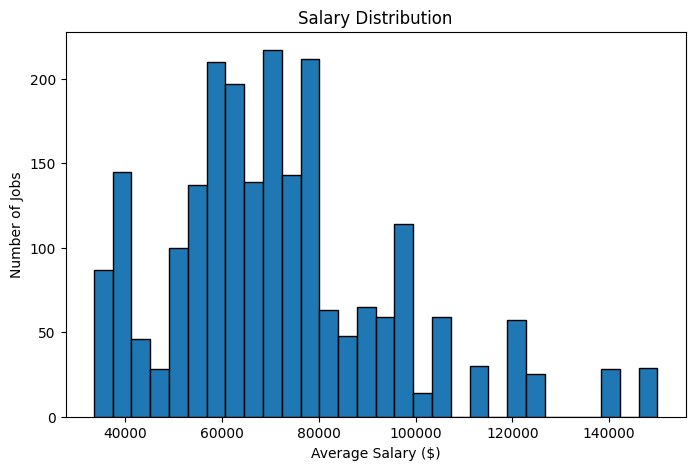

In [16]:
#salary distrbution
plt.figure(figsize=(8,5))
df['avg_salary'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title("Salary Distribution")
plt.xlabel("Average Salary ($)")
plt.ylabel("Number of Jobs")
plt.show()


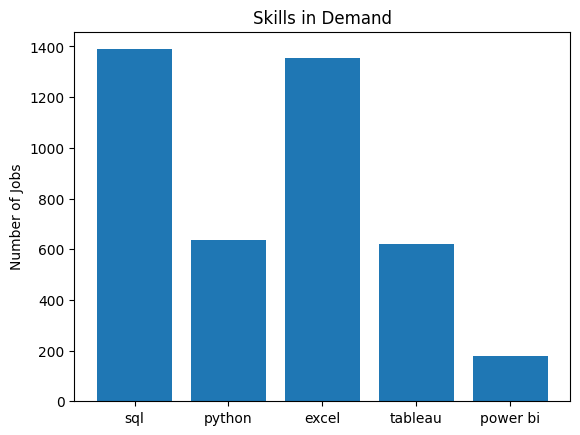

In [17]:
#demanding skills
skill_counts = {skill: df[f'skill_{skill}'].sum() for skill in skills}
plt.bar(skill_counts.keys(), skill_counts.values())
plt.title("Skills in Demand")
plt.ylabel("Number of Jobs")
plt.show()


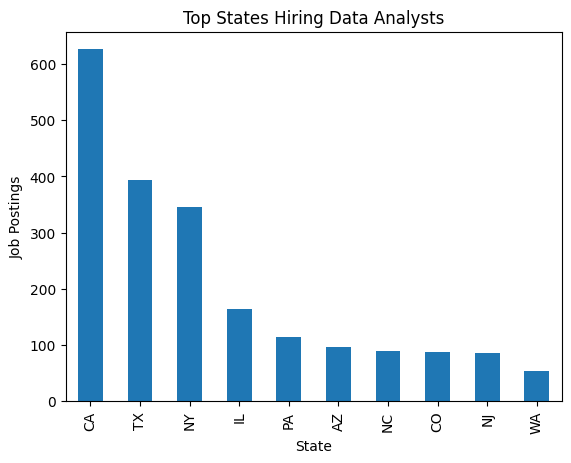

In [18]:
#top states
df['State'].value_counts().head(10).plot(kind='bar')
plt.title("Top States Hiring Data Analysts")
plt.ylabel("Job Postings")
plt.show()
